In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ci_bars(data, xlabel="AUC", ylabel="Measures", title="Confidence Intervals"):
    """
    Plots error bars for the means and 95% confidence intervals provided in the data.
    
    Args:
    - data (dict): A dictionary where each key is a label and the value is a sub-dict with keys "mean" and "CI" (confidence interval).
                  Example:
                  {
                      "Label1": {"mean": 0.7, "CI": (0.65, 0.75)},
                      "Label2": {"mean": 0.55, "CI": (0.5, 0.6)},
                  }
    - xlabel (str): Label for the x-axis.
    - ylabel (str): Label for the y-axis.
    - title (str): Title for the plot.
    """
    
    # Extract labels, means, and CIs from the data
    labels = list(data.keys())
    means = [data[label]['mean'] for label in labels]
    lower_ci = [data[label]['CI'][0] for label in labels]
    upper_ci = [data[label]['CI'][1] for label in labels]
    
    # Convert to arrays for easier manipulation
    means = np.array(means)
    lower_ci = np.array(lower_ci)
    upper_ci = np.array(upper_ci)
    
    # Calculate error bars (distance from mean to the CI limit)
    lower_err = means - lower_ci
    upper_err = upper_ci - means
    errors = [lower_err, upper_err]

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))

    # Plot the error bars
    ax.errorbar(means, np.arange(len(labels)), xerr=errors, fmt='o', color='black', ecolor='gray',
                elinewidth=2, capsize=4)

    # Add dashed vertical line at 0.5 (like in your image)
    ax.axvline(x=0.5, color='gray', linestyle='--')

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_yticks(np.arange(len(labels)))
    ax.set_yticklabels(labels)
    ax.set_title(title)

    # Reverse the y-axis to match your example plot
    ax.invert_yaxis()

    # Show the plot
    plt.tight_layout()
    plt.show()
    return fig


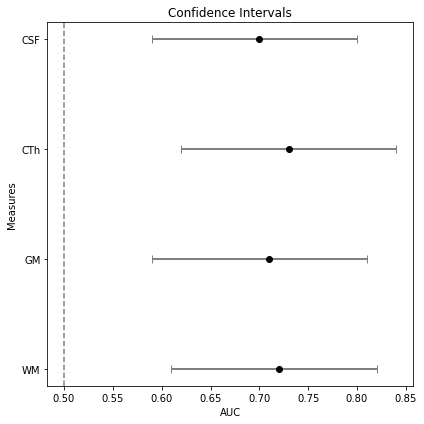

In [9]:
# Example usage:
data = {
    "CSF": {"mean": 0.70, "CI": (0.59, 0.8)},
    "CTh": {"mean": 0.73, "CI": (0.62, 0.84)},
    "GM": {"mean": 0.71, "CI": (0.59, 0.81)},
    "WM": {"mean": 0.72, "CI": (0.61, 0.82)}
}

ci_fig = plot_ci_bars(data)

In [10]:
ci_fig.savefig('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/diagnostic_ability_ad-cn/ci95fig.svg')